In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
def fslope(slope, chi1, chi0, bound0):
    return bound0*np.exp(slope*(np.log(chi1)-np.log(chi0)))

In [3]:
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0] + 1)

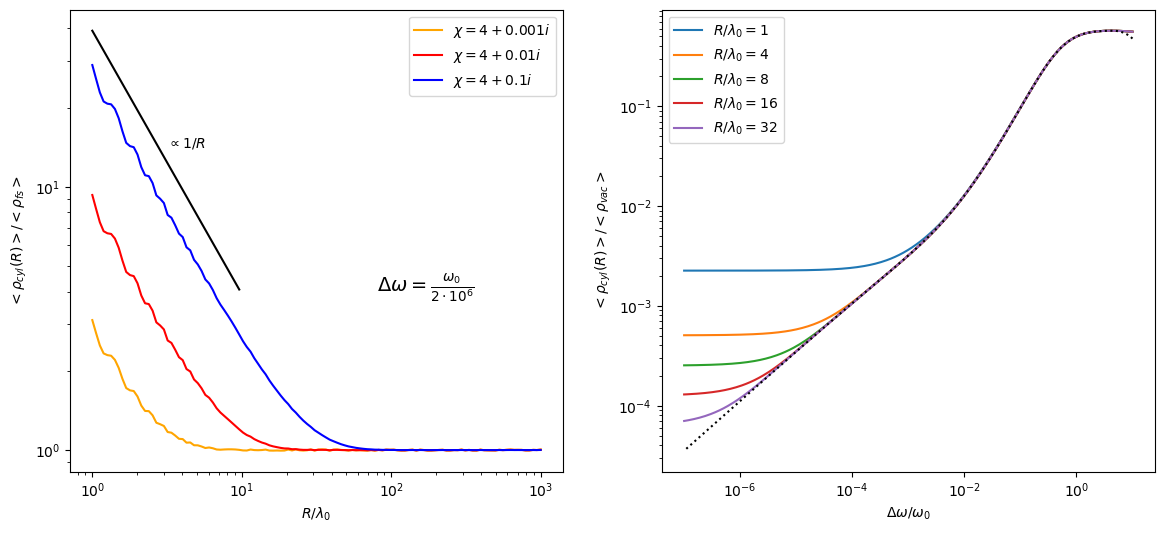

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

filenamesL = ['TM_circular_grating_L_run_chi4+1e-3i_L','TM_circular_grating_L_run_chi4+1e-2i_L','TM_circular_grating_L_run_chi4+1e-1i_L']
filenamesQ = ['min_2DTM_4+1e-3j_Qsrc_bounds.npy','min_2DTM_4+1e-2j_Qsrc_bounds.npy','min_2DTM_4+1e-1j_Qsrc_bounds.npy']

styles = ['solid','solid','solid','solid']
# colors = ['green','orange','red','blue']
colors = ['orange','red','blue','green']
lab = ['$\chi = 4 + 0.001i$','$\chi = 4 + 0.01i$','$\chi = 4 + 0.1i$','$\chi = 4.0$']
for k in range(len(filenamesL)):
    inf_bounds_list = np.load(filenamesQ[k])
    infBound = inf_bounds_list[-1]
    L_bounds_list = np.load(filenamesL[k] + '_bounds.npy')
    L_list = np.load(filenamesL[k] + '_list.npy')
    rescaledbounds = (1+L_bounds_list)/abs(infBound)
    ax1.plot(L_list, rescaledbounds, color=colors[k], linestyle=styles[k], label=lab[k])
    
### plot slopes
k = 2
inf_bounds_list = np.load(filenamesQ[k])
infBound = inf_bounds_list[-1]
L_bounds_list = np.load(filenamesL[k] + '_bounds.npy')
L_list = np.load(filenamesL[k] + '_list.npy')
rescaledbounds = (1+L_bounds_list)/abs(infBound)
slopeL = L_list[0:40]
slopeBounds = np.array(list(map(lambda L: fslope(-1.0, L, L_list[0], 1.35*rescaledbounds[0]), slopeL)))
ax1.plot(slopeL, slopeBounds, color='black')
ax1.annotate('$\propto 1/R$', (slopeL[25], 1.35*slopeBounds[25]), # these are the coordinates to position the label
                 xytext=(0,11), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

ax1.annotate('$\Delta\omega = \\frac{\omega_{0}}{2\cdot 10^{6}}$', (170, 4), # these are the coordinates to position the label
                 xytext=(0,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center',
            **{'fontsize':14}) # horizontal alignment can be left, right or center
### label
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('$R/\lambda_{0}$')
ax1.set_ylabel('$<\\rho_{cyl}(R)>/<\\rho_{fs}>$')
ax1.legend()
#################################################

filenames = ['DATA_PRL/TM_circular_grating_dw_run_R1_chi4+1e-1i',
            'DATA_PRL/TM_circular_grating_dw_run_R4_chi4+1e-1i',
            'DATA_PRL/TM_circular_grating_dw_run_R8_chi4+1e-1i',
            'DATA_PRL/TM_circular_grating_dw_run_R16_chi4+1e-1i',
            'DATA_PRL/TM_circular_grating_dw_run_R32_chi4+1e-1i']

# labels = ['global', 'local']

R_list = ['1', '4', '8', '16', '32']

for i in range(len(filenames)):
    filename = filenames[i]
    bounds_list = np.load(filename + '_dw_bounds.npy')
    dw_list = np.load(filename + '_dw_list.npy')
    ax2.plot(dw_list, 1 + bounds_list, label='$R/\lambda_{0} = ' + R_list[i] + '$', zorder=0)

#plot inf space results
inf_bounds_list = np.load("DATA_PRL/min_2DTM_4+1e-1j_dwQsrc_bounds.npy")
inf_Qsrc_list = np.load("DATA_PRL/min_2DTM_4+1e-1j_dwQsrc.npy")

#plot semi-analytic full-space bounds
ax2.plot(np.reciprocal(2*inf_Qsrc_list), inf_bounds_list, linestyle='dotted', color='black', zorder=0)

# plt.ylim([1e-5, 1])
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('$\Delta\omega/\omega_{0}$')
ax2.set_ylabel('$<\\rho_{cyl}(R)>/<\\rho_{vac}>$')
ax2.legend()

plt.savefig('cylfscomparison.pdf', bbox_inches='tight')

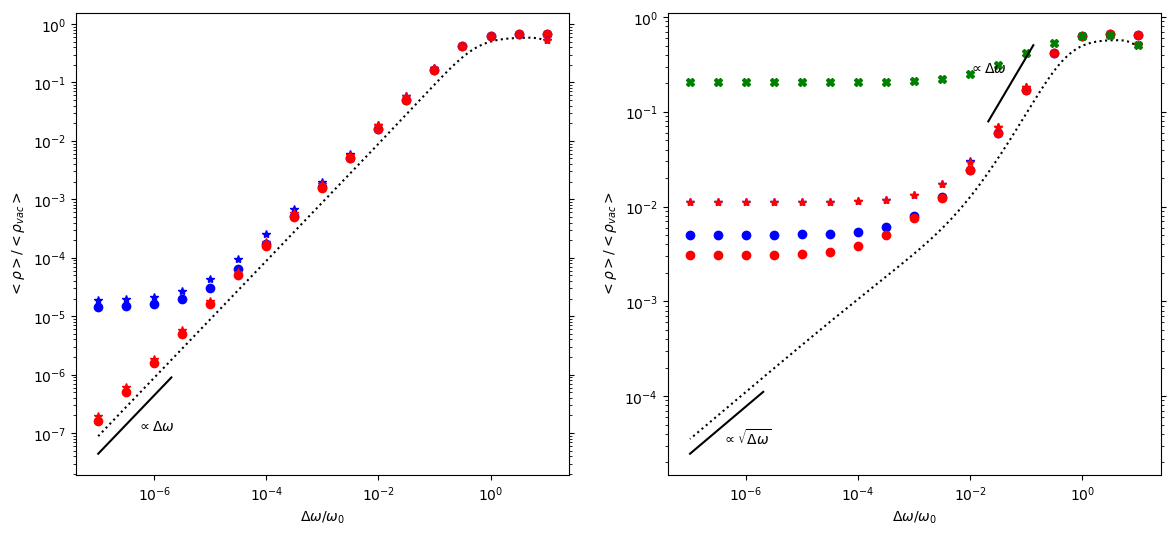

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))

colors = ['blue', 'red']

#plot inf-space first
#plot \delta\omega/\omega_{0} (rather than Q) versus the bounds. include full-space curve.
inf_bounds_list = np.load("DATA_PRL/min_2DTM_4+0j_dwQsrc_bounds.npy")
inf_Qsrc_list = np.load("DATA_PRL/min_2DTM_4+0j_dwQsrc.npy")

#plot semi-analytic full-space bounds
ax1.plot(np.reciprocal(2*inf_Qsrc_list), inf_bounds_list, linestyle='dotted', label='$L/\lambda_{0} = \infty$', color='black', zorder=0)


#plot cylindrical inverse designs
design_enh_files = ['DATA_PRL/TMcyl_chi4+0j_R2p5_gpr1200_LDOS_sca_enh.txt',
                'DATA_PRL/TMcyl_chi4+0j_R5_gpr1200_LDOS_sca_enh.txt']
design_Qsrc_files = ['DATA_PRL/TMcyl_chi4+0j_R2p5_gpr1200_Qsrc.txt',
                     'DATA_PRL/TMcyl_chi4+0j_R5_gpr1200_Qsrc.txt']
L_vals = [6, 10]
for i in range(len(design_enh_files)): 
    invdes_vals = np.loadtxt(design_enh_files[i])
    invdes_Q = np.loadtxt(design_Qsrc_files[i])
    ax1.plot(np.reciprocal(2*invdes_Q[0:len(invdes_vals)]), 1 - invdes_vals, 'o', label='$R/\lambda_{0} = $' + str(L_vals[i]), zorder=0, color=colors[i])
#next plot periodic inverse designs (so they appear on top of curves)
#plot chi = 4 + 0j
bounds_files = ['DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval1000_Wfunc_normalized_vacstart_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt']
for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax1.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, '*', color=colors[i], zorder=1)    

#add slopes
end_ind = len(inf_bounds_list)
start_ind = end_ind - 40
ind_width = abs(end_ind - start_ind)
slopeQsrc = inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-1.0, Qsrc, inf_Qsrc_list[end_ind-ind_width//2], 0.5*inf_bounds_list[end_ind-ind_width//2]), slopeQsrc)))
ax1.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax1.annotate('$\propto \Delta\omega$', (1.0/(2*inf_Qsrc_list[end_ind-ind_width//3]), 0.5*(inf_bounds_list[end_ind-ind_width//3])), # these are the coordinates to position the label
                 xytext=(25,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal aslignment can be left, right or center

#################################################
#plot semi-analytic full-space bounds
inf_bounds_list = np.load("DATA_PRL/min_2DTM_4+1e-1j_dwQsrc_bounds.npy")
inf_Qsrc_list = np.load("DATA_PRL/min_2DTM_4+1e-1j_dwQsrc.npy")

#plot semi-analytic full-space bounds
ax2.plot(np.reciprocal(2*inf_Qsrc_list), inf_bounds_list, linestyle='dotted', label='$L/\lambda_{0} = \infty$', color='black', zorder=0)

#plot cylindrical inverse designs
design_enh_files = ['DATA_PRL/TMcyl_chi4+1e-1j_R2p5_gpr1200_LDOS_sca_enh.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R5_gpr1200_LDOS_sca_enh.txt']

design_Qsrc_files = ['DATA_PRL/TMcyl_chi4+1e-1j_R2p5_gpr1200_Qsrc.txt',
               'DATA_PRL/TMcyl_chi4+1e-1j_R5_gpr1200_Qsrc.txt']
L_vals = [5, 10]
for i in range(len(design_enh_files)): 
    invdes_vals = np.loadtxt(design_enh_files[i])
    invdes_Q = np.loadtxt(design_Qsrc_files[i])
    ax2.plot(np.reciprocal(2*invdes_Q), 1 - invdes_vals, 'o', label='$R/\lambda_{0} = $' + str(L_vals[i]), color=colors[i], zorder=0)

#periodic a=1lambda
bounds_files = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_bounds.txt',
               'DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval1000_Wfunc_normalized_vacstart_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt',
             'DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval1000_Wfunc_normalized_vacstart_Qsrc.txt']

for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax2.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, '*', color=colors[i], zorder=1)
    
#periodic a=0p35lambda
bounds_files = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e6_periodicfullspace_N14_period0p35_maxeval500_Wfunc_normalized_vacstart_bounds.txt']
Qsrc_files = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e6_periodicfullspace_N14_period0p35_maxeval500_Wfunc_normalized_vacstart_Qsrc.txt']

for i in range(len(bounds_files)): 
    bounds_list = np.loadtxt(bounds_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax2.plot(np.reciprocal(2*Qsrc_list[0:len(bounds_list)]), bounds_list, 'X', color='green', zorder=1)
    
#plot slopes
end_ind = len(inf_Qsrc_list)
start_ind = end_ind - 40
ind_width = abs(end_ind - start_ind)
slopeQsrc = inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-.5, Qsrc, inf_Qsrc_list[end_ind-ind_width//2], 0.7*inf_bounds_list[end_ind-ind_width//2]), slopeQsrc)))
ax2.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax2.annotate('$\propto \sqrt{\Delta\omega}$', (1.0/(2*inf_Qsrc_list[end_ind-ind_width//2]), 0.7*(inf_bounds_list[end_ind-ind_width//2])), # these are the coordinates to position the label
                 xytext=(15,-15), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

#plot slopes
shift = 56
start_ind = 0 + shift
end_ind = start_ind + 25
ind_width = (end_ind - start_ind)
slopeQsrc = inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-1.0, Qsrc, inf_Qsrc_list[end_ind-ind_width//2], 3.8*inf_bounds_list[end_ind-ind_width//2]), slopeQsrc)))
ax2.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax2.annotate('$\propto \Delta\omega$', (1.0/(2*inf_Qsrc_list[end_ind-ind_width//2]), 3.8*(inf_bounds_list[end_ind-ind_width//2])), # these are the coordinates to position the label
                 xytext=(-15,10), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

### label
ax1.set_xscale('log')
ax1.set_yscale('log')
# ax1.set_ylim([1e-7, 1])
# ax2.set_ylim([1e-5, 1])
ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
# ax1.title.set_text('$\chi = 4$')
# ax2.title.set_text('$\chi = 4 + 0.1i$')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax1.set(xlabel='$\Delta\omega/\omega_{0}$')
ax1.set(ylabel='$<\\rho>/<\\rho_{vac}>$')
ax2.set(xlabel='$\Delta\omega/\omega_{0}$')
ax2.set(ylabel='$<\\rho>/<\\rho_{vac}>$')
# ax1.legend()
# ax2.legend()
plt.savefig('chi4and4+1e-1jperiodic.pdf', bbox_inches='tight')
plt.savefig('chi4and4+1e-1jperiodic.png', bbox_inches='tight')

In [6]:
10**np.linspace(-1,-5,10)

array([1.00000000e-01, 3.59381366e-02, 1.29154967e-02, 4.64158883e-03,
       1.66810054e-03, 5.99484250e-04, 2.15443469e-04, 7.74263683e-05,
       2.78255940e-05, 1.00000000e-05])

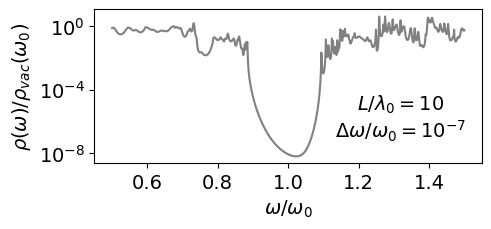

In [7]:
#Combined
###spectrum
filenames = ['DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval500_Wfunc_normalized_vacstart_Qabs5.0e+06_L10.0_optdof_spectrum.txt']
ldos_list = np.loadtxt(filenames[0])
omegas = np.linspace(-1/2, 1/2, len(ldos_list)) + 1
plt.figure(figsize=(5,2))
plt.rc('font', size=14)
plt.plot(omegas, ldos_list, color='gray')

#######
plt.annotate('$L/\lambda_{0} = 10$', (1.32, ldos_list[-1]/10**5), # these are the coordinates to position the label
                 xytext=(0,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

plt.annotate('$\Delta\omega/\omega_{0} = 10^{-7}$', (1.32, 1/10**7), # these are the coordinates to position the label
                 xytext=(0,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

plt.xlabel('$\omega/\omega_{0}$')
plt.ylabel('$\\rho(\omega)/\\rho_{vac}(\omega_{0})$')
# plt.locator_params(axis='y', nbins=6)
# plt.locator_params(axis='x', nbins=6)
plt.yscale('log')
plt.yticks([1e0,1e-4,1e-8])
# plt.xscale('log')
plt.savefig('chi4+0j_periodic_Qsrc5e6_L10_optdof_spectrum.pdf', bbox_inches='tight')
# plt.rc('axes', labelsize=6) 

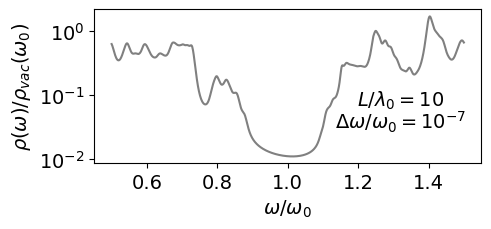

In [8]:
#Combined
###spectrum
filenames = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval500_Wfunc_normalized_vacstart_Qabs5.0e+06_L10.0_optdof_spectrum.txt']
ldos_list = np.loadtxt(filenames[0])
omegas = np.linspace(-1/2, 1/2, len(ldos_list)) + 1
plt.figure(figsize=(5,2))
plt.rc('font', size=14)
plt.plot(omegas, ldos_list, color='gray')

#######
plt.annotate('$L/\lambda_{0} = 10$', (1.32, ldos_list[-1]/10**1), # these are the coordinates to position the label
                 xytext=(0,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

plt.annotate('$\Delta\omega/\omega_{0} = 10^{-7}$', (1.32, 3/10**2), # these are the coordinates to position the label
                 xytext=(0,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

plt.xlabel('$\omega/\omega_{0}$')
plt.ylabel('$\\rho(\omega)/\\rho_{vac}(\omega_{0})$')
# plt.locator_params(axis='y', nbins=6)
# plt.locator_params(axis='x', nbins=6)
plt.yscale('log')
plt.yticks([1e0,1e-1,1e-2])
# plt.xscale('log')
plt.savefig('chi4+1e-1j_periodic_Qsrc5e6_L10_optdof_spectrum.pdf', bbox_inches='tight')
# plt.rc('axes', labelsize=6) 

/var/folders/0h/qqn4knqj35j78xwx0j8np1540000gn/T/ipykernel_14416/549172658.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


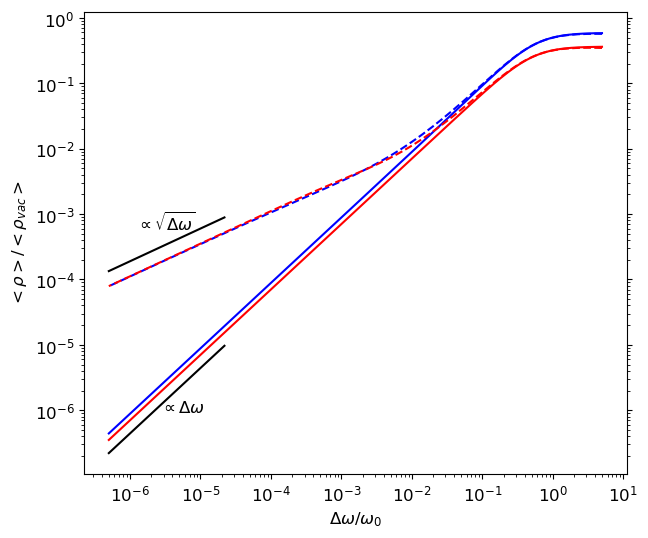

In [9]:
# filenamesTM = ['min_2DTM_2+1e-1j_Qsrc','min_2DTM_4+1e-1j_Qsrc','min_2DTM_6+1e-1j_Qsrc']
# filenamesTE = ['min_2DTE_2+1e-1j_Qsrc','min_2DTE_4+1e-1j_Qsrc','min_2DTE_6+1e-1j_Qsrc']
# filenames3D = ['min_3Dz_2+1e-1j_Qsrc', 'min_3Dz_4+1e-1j_Qsrc','min_3Dz_6+1e-1j_Qsrc']
# chis = [2 + 0.1*1j, 4 + 0.1*1j, 6 + 0.1*1j]
# filenamesTM = ['min_2DTM_4+1e-1j_Qsrc','min_2DTM_6+1e-1j_Qsrc','min_2DTM_9+1e-1j_Qsrc']
plt.figure(figsize=(7,6))
plt.rc('font', size=12)
filenames = ['min_2DTM_4_Qsrc', 'min_1D_4+0j_Qsrc', 'min_2DTM_4+1e-1j_Qsrc','min_1D_4+1e-1j_Qsrc']
dippol = ['2D TM','1D', '2D TM', '1D']
styles = ['solid', 'solid','dashed','dashed']
colors = ['blue', 'red', 'blue', 'red']
for k in range(len(filenames)):
    filename = filenames[k]
    bounds_list = np.load(filename + '_bounds.npy')
    cur_Qsrc_list = np.load(filename + '.npy')
    start_ind = 0
    plt.plot(np.reciprocal(2*cur_Qsrc_list[start_ind:]), bounds_list[start_ind:], linestyle=styles[k], color=colors[k])

filename = filenames[3]
bounds_list = np.load(filename + '_bounds.npy')
cur_Qsrc_list = np.load(filename + '.npy')
start_ind = 0
slopeQsrc = cur_Qsrc_list[160:]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-0.5, Qsrc, cur_Qsrc_list[165], 1.7*bounds_list[165]), slopeQsrc)))
plt.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
plt.annotate('$\propto \sqrt{\Delta\omega}$', (1.0/(2*cur_Qsrc_list[185]), 1.8*(bounds_list[185])), # these are the coordinates to position the label
                 xytext=(0,9), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

filename = filenames[0]
bounds_list = np.load(filename + '_bounds.npy')
cur_Qsrc_list = np.load(filename + '.npy')
start_ind = 0
slopeQsrc = cur_Qsrc_list[160:]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-1.0, Qsrc, cur_Qsrc_list[165], 0.5*bounds_list[165]), slopeQsrc)))
plt.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
plt.annotate('$\propto \Delta\omega$', (1.0/(2*cur_Qsrc_list[180]), 0.3*(bounds_list[180])), # these are the coordinates to position the label
                 xytext=(4,-6), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

plt.xscale('log')
plt.yscale('log')
# plt.xlabel('Inverse bandwidth $\\frac{1}{\Delta\omega}$')
# plt.xlabel('$\\frac{\omega_{0}}{2\Delta\omega}$')
# plt.xlabel('$\\frac{\Delta\omega}{\omega_{0}}$')
plt.xlabel('$\Delta\omega/\omega_{0}$')
# plt.ylabel('$1 + \\rho_{sca}(\\tilde{\omega})/\\rho_{0}$')
# plt.ylabel('$<\\rho>_{\omega_0, \Delta\omega}/\\rho_{0}$')
plt.ylabel('$<\\rho>/<\\rho_{vac}>$')
# plt.title('Fullspace LDOS Minimization for Dipole in 3D Space')
# plt.title('Minimization for Dipole in 3D Space')
plt.xticks(np.logspace(-6,1,8))
ax = plt.axes()
ax.yaxis.set_ticks_position('both')
# plt.legend()
plt.savefig('totLDOSmin2DTM1DvsQsrc.pdf', bbox_inches='tight')
plt.savefig('totLDOSmin2DTM1DvsQsrc.png', bbox_inches='tight')

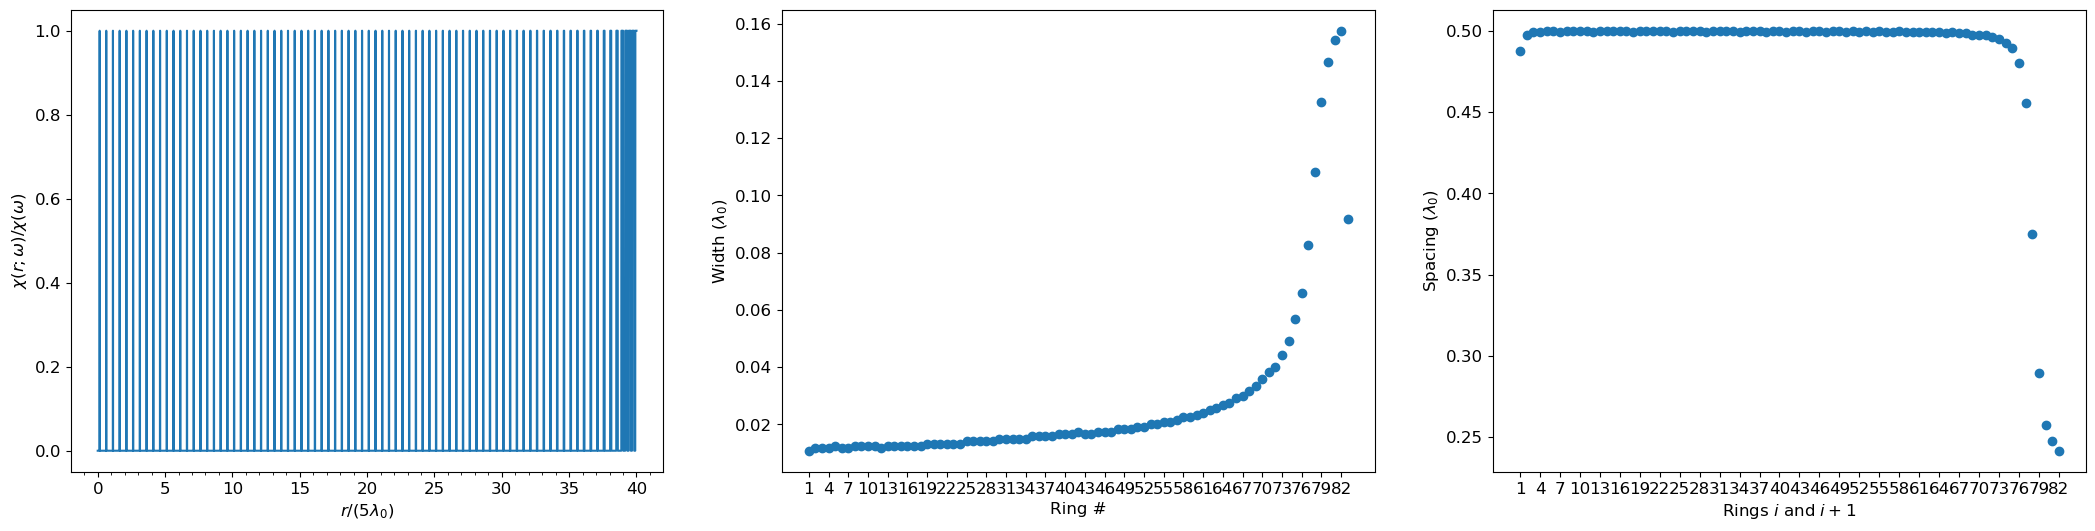

In [10]:
#plot rings
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(26,6))
des_list = np.loadtxt('DATA_PRL/TMcyl_chi4+1e-1j_R40_gpr1200_Qsrc5.0e+06_optdof.txt')
desR = 5
gpr=1200
# plt.figure(figsize=(6,6))
###structure
# fig, ax1 = plt.subplots(1, 1, figsize=(6,6))
# ax1 = plt.subplot(131, projection='polar')
# r_list = np.linspace(0, 1, len(des_list)) + 600

# azm = np.linspace(0, 2 * np.pi, 60)
# r, th = np.meshgrid(r_list, azm)
# z = np.tile(np.absolute(des_list), (r.shape[0], 1))

# col_map = plt.cm.get_cmap('gray')
# col_rev = col_map.reversed()
# ax1.pcolormesh(th, r, z, shading='auto', cmap=col_rev)
# ax1.set_rticks([])
# ax1.grid(False)
# ax1.axis("off")
# ax1.set_xlabel('$\\frac{L}{\lambda_{0}} = 10, \chi = 4 + 1i, \\frac{\Delta\omega}{\omega_{0}} = \\frac{1}{6.4\cdot 10^{3}}$')
##

ax1.plot(np.arange(0, len(des_list))/gpr + 0.5/gpr, des_list)
ax1.set_xlabel('$r/(5\lambda_{0}$)')
ax1.set_ylabel('$\chi(r;\omega)/\chi(\omega)$')
# ax2.locator_params(axis='x', nbins=6)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
#plot widths
indGrating = np.nonzero(des_list.round())
gratings = consecutive(indGrating[0])
ax2.plot(np.linspace(1, len(gratings), num=len(gratings), endpoint=True), [len(gratings[i])/gpr for i in range(len(gratings))], 'o')
ax2.set_xlabel('Ring #')
ax2.set_ylabel('Width ($\lambda_{0}$)')
ax2.set_xticks(np.arange(1,len(gratings)+1,3))
#plot spacing
ax3.plot(np.linspace(1, len(gratings)-1, num=len(gratings)-1, endpoint=True), [(gratings[i+1][0] - gratings[i][0])/gpr for i in range(len(gratings)-1)], 'o')
ax3.set_xlabel('Rings $i$ and $i+1$')
ax3.set_ylabel('Spacing ($\lambda_{0}$)')
ax3.set_xticks(np.arange(1,len(gratings)+1,3))

plt.savefig('minLDOS_TM_chi4+1e-1jQsrc5.0e+06_cyl_L10.pdf', bbox_inches='tight')

In [11]:
len(gratings[0])

13

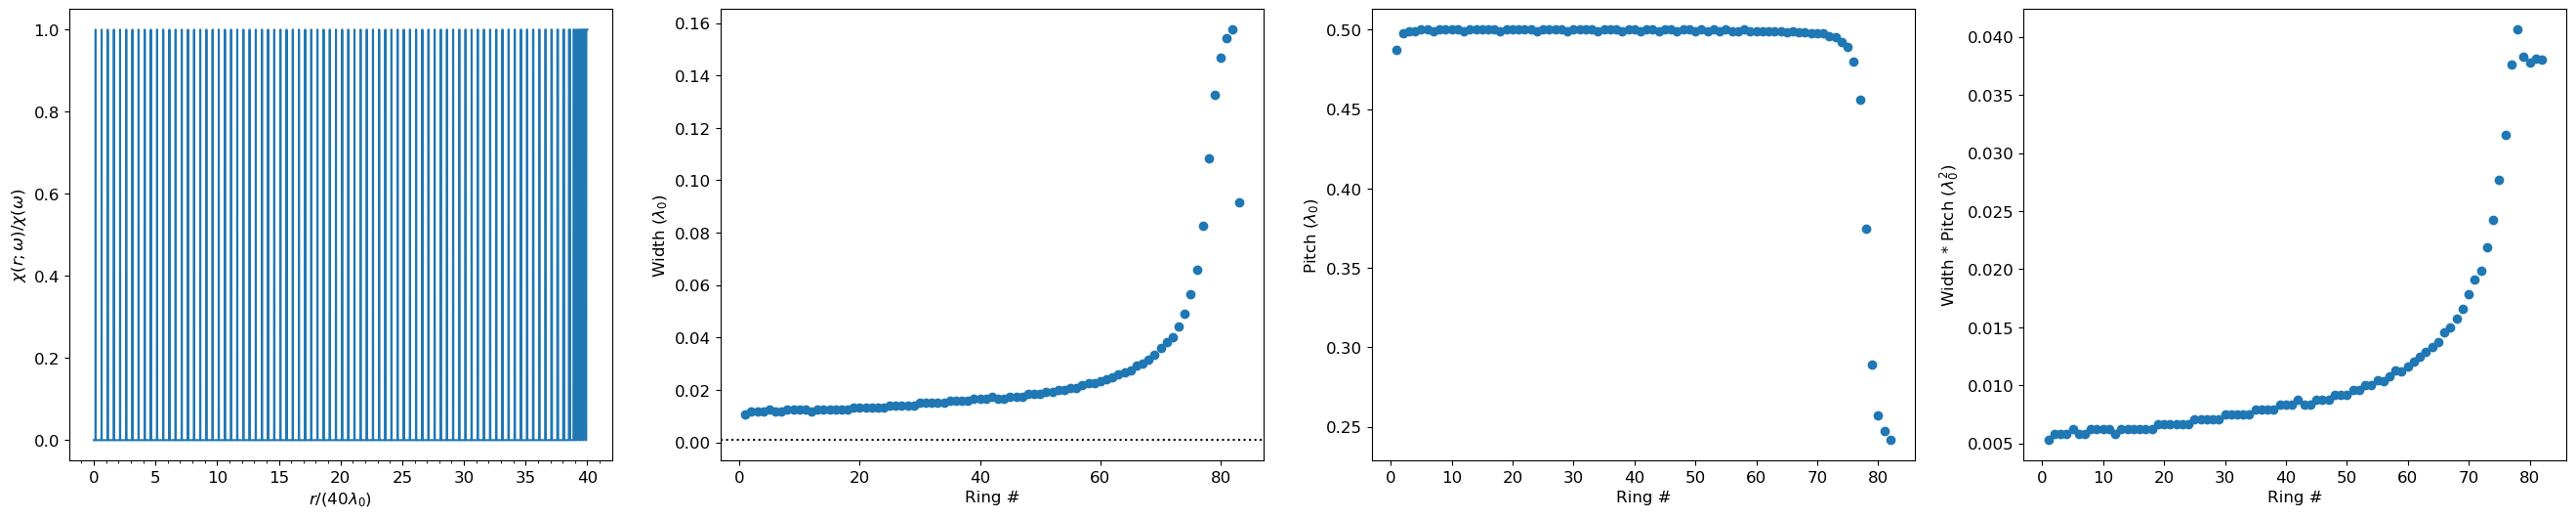

In [12]:
#plot rings
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(33,6))
des_list = np.loadtxt('DATA_PRL/TMcyl_chi4+1e-1j_R40_gpr1200_Qsrc5.0e+06_optdof.txt')
desR = 40
gpr=1200

ax1.plot(np.arange(0, len(des_list))/gpr + 0.5/gpr, des_list)
ax1.set_xlabel('$r/(' + str(desR) + '\lambda_{0}$)')
ax1.set_ylabel('$\chi(r;\omega)/\chi(\omega)$')
ax1.xaxis.set_minor_locator(AutoMinorLocator())
#plot widths
indGrating = np.nonzero(des_list.round())
gratings = consecutive(indGrating[0])
ax2.plot(np.linspace(1, len(gratings), num=len(gratings), endpoint=True), [len(gratings[i])/gpr for i in range(len(gratings))], 'o')
ax2.set_xlabel('Ring #')
ax2.set_ylabel('Width ($\lambda_{0}$)')
ax2.axhline(y = 1/gpr, color = 'black', linestyle = ':')
# ax2.set_yscale('log')
# ax2.set_xscale('log')
#plot spacing
ax3.plot(np.linspace(1, len(gratings)-1, num=len(gratings)-1, endpoint=True), [(gratings[i+1][0] - gratings[i][0])/gpr for i in range(len(gratings)-1)], 'o')
ax3.set_xlabel('Ring #')
ax3.set_ylabel('Pitch ($\lambda_{0}$)')
# ax3.set_yscale('log')
# ax3.set_xscale('log')
#product of spacing and thickness
ax4.plot(np.linspace(1, len(gratings)-1, num=len(gratings)-1, endpoint=True), [len(gratings[i])*(gratings[i+1][0] - gratings[i][0])/gpr**2 for i in range(len(gratings)-1)], 'o')
ax4.set_xlabel('Ring #')
ax4.set_ylabel('Width * Pitch ($\lambda_{0}^{2}$)')
# ax4.set_yscale('log')
# ax4.set_xscale('log')
#try to fit squared func
# sqcoeff = len(gratings[0])*(gratings[0+1][0] - gratings[0][0])/gpr
# ax4.plot(np.linspace(1, len(gratings)-1, num=len(gratings)-1, endpoint=True), [sqcoeff*(i+1)**2 for i in range(len(gratings)-1)], 'o')

plt.savefig('minLDOS_TM_chi4+1e-1jQsrc5.0e+06_cyl_L80.pdf', bbox_inches='tight')

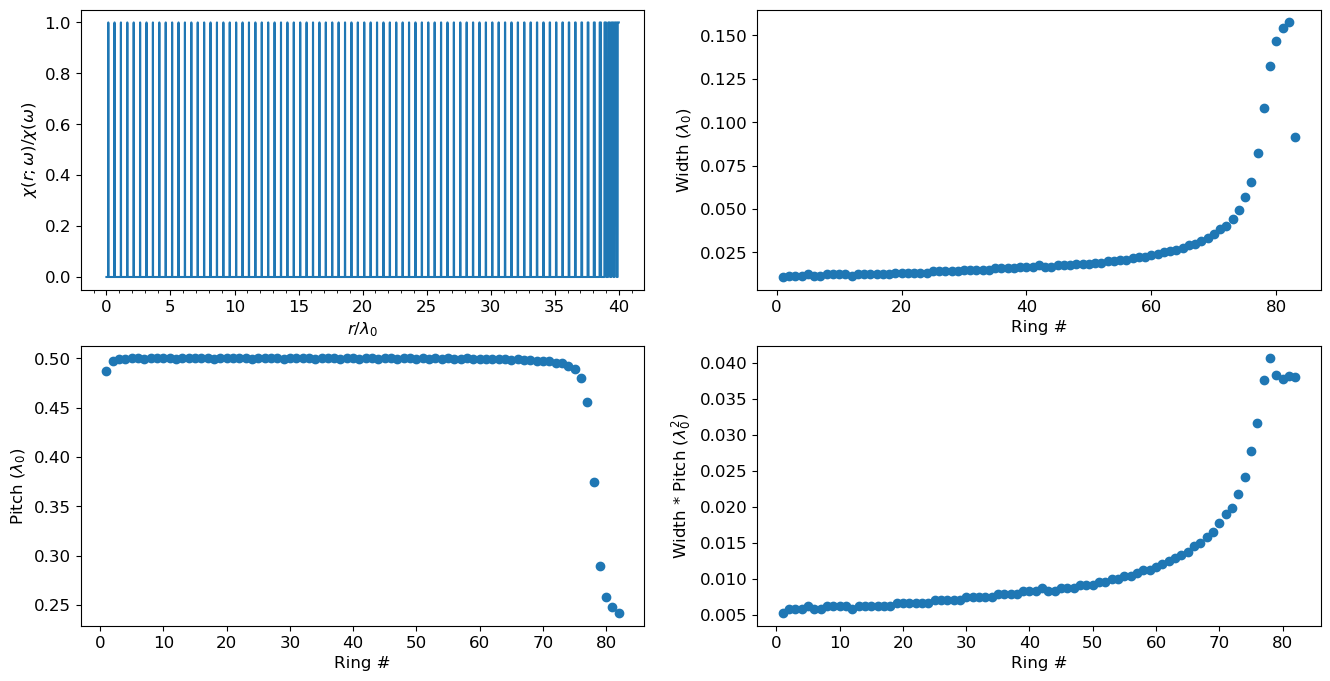

In [13]:
#plot rings
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,8))
des_list = np.loadtxt('DATA_PRL/TMcyl_chi4+1e-1j_R40_gpr1200_Qsrc5.0e+06_optdof.txt')
desR = 40
gpr=1200

ax1.plot(np.arange(0, len(des_list))/gpr + 0.5/gpr, des_list)
ax1.set_xlabel('$r/\lambda_{0}$')
ax1.set_ylabel('$\chi(r;\omega)/\chi(\omega)$')
ax1.xaxis.set_minor_locator(AutoMinorLocator())
#plot widths
indGrating = np.nonzero(des_list.round())
gratings = consecutive(indGrating[0])
ax2.plot(np.linspace(1, len(gratings), num=len(gratings), endpoint=True), [len(gratings[i])/gpr for i in range(len(gratings))], 'o')
ax2.set_xlabel('Ring #')
ax2.set_ylabel('Width ($\lambda_{0}$)')
# ax2.axhline(y = 1/gpr, color = 'black', linestyle = ':')
# ax2.set_yscale('log')
# ax2.set_xscale('log')
#plot spacing
ax3.plot(np.linspace(1, len(gratings)-1, num=len(gratings)-1, endpoint=True), [(gratings[i+1][0] - gratings[i][0])/gpr for i in range(len(gratings)-1)], 'o')
ax3.set_xlabel('Ring #')
ax3.set_ylabel('Pitch ($\lambda_{0}$)')
# ax3.set_yscale('log')
# ax3.set_xscale('log')
#product of spacing and thickness
ax4.plot(np.linspace(1, len(gratings)-1, num=len(gratings)-1, endpoint=True), [len(gratings[i])*(gratings[i+1][0] - gratings[i][0])/gpr**2 for i in range(len(gratings)-1)], 'o')
ax4.set_xlabel('Ring #')
ax4.set_ylabel('Width * Pitch ($\lambda_{0}^{2}$)')
# ax4.set_yscale('log')
# ax4.set_xscale('log')
#try to fit squared func
# sqcoeff = len(gratings[0])*(gratings[0+1][0] - gratings[0][0])/gpr
# ax4.plot(np.linspace(1, len(gratings)-1, num=len(gratings)-1, endpoint=True), [sqcoeff*(i+1)**2 for i in range(len(gratings)-1)], 'o')

plt.savefig('minLDOS_TM_chi4+1e-1jQsrc5.0e+06_cyl_L80.pdf', bbox_inches='tight')

In [14]:
gratings[0]

array([164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176])

In [15]:
0.5/gpr + 164/gpr

0.13708333333333333

In [16]:
test = np.zeros(10)
Nz = len(test)
sR = Nz//2
sL = sR - 1
sR = sR + 1

In [17]:
test[sL:sR] = 1

In [18]:
sR-sL

2

In [19]:
test

array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0.])

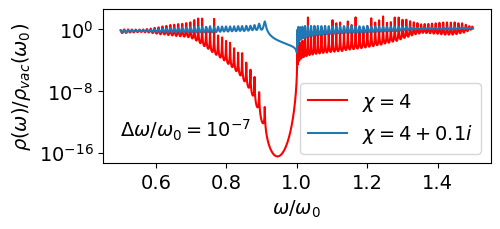

In [20]:
#Combined
###spectrum
#filenames = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_Qabs5.0e+06_L5.0_optdof_spectrum.txt']
filenames = ['DATA_PRL/TMcyl_chi4+1e-1j_R40_gpr1200_Qsrc5.0e+06_optdof_lossless_spectrum.npy']

ldos_list = np.load(filenames[0])
omegas = np.linspace(-1/2, 1/2, len(ldos_list)) + 1
plt.figure(figsize=(5,2))
plt.rc('font', size=14)
plt.plot(omegas, ldos_list, color='red', label='$\chi = 4$')

# indC = len(ldos_list)//2 - 130
# indL = indC - 40
# indL = 0
# indR = indC + 120
# indR = len(ldos_list) - 1
# prefactorR = ldos_list[indR]/np.sqrt(omegas[indR] - omegas[indC])
# plt.plot(omegas[indC:indR], prefactorR*np.sqrt(omegas[indC:indR] - omegas[indC]), label='$\propto \sqrt{\omega - \omega_{0}}$', color='orange', linestyle='dotted')

# prefactorindL = indC - 45
# prefactorL = ldos_list[prefactorindL]/np.sqrt(omegas[indC] - omegas[prefactorindL])
# plt.plot(omegas[indL:indC], prefactorL*np.sqrt(omegas[indC] - omegas[indL:indC]), label='$\propto \sqrt{\omega_{0} - \omega}$', color='orange', linestyle='dotted')

####plot circular results
filenames = ['DATA_PRL/TMcyl_chi4+1e-1j_R40_gpr1200_Qsrc5.0e+06_optdof_spectrum.npy']
ldos_list = np.load(filenames[0])
omegas = np.linspace(-1/2, 1/2, len(ldos_list)) + 1
plt.rc('font', size=14)
plt.plot(omegas, ldos_list, label='$\chi = 4 + 0.1i$')
#######
# plt.annotate('$L/\lambda_{0} = 6$', (1.32, ldos_list[-1]/10**2), # these are the coordinates to position the label
#                  xytext=(0,0), # distance from text to points (x,y)
#                  textcoords="offset points",
#                  ha='center') # horizontal alignment can be left, right or center

# plt.annotate('$\Delta\omega/\omega_{0} = 10^{-7}$', (1.32, 0.0015), # these are the coordinates to position the label
#                  xytext=(0,0), # distance from text to points (x,y)
#                  textcoords="offset points",
#                  ha='center') # horizontal alignment can be left, right or center

plt.annotate('$\Delta\omega/\omega_{0} = 10^{-7}$', (omegas[len(ldos_list)//6]*1.025, 1e-14), # these are the coordinates to position the label
                 xytext=(0,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center


plt.xlabel('$\omega/\omega_{0}$')
plt.ylabel('$\\rho(\omega)/\\rho_{vac}(\omega_{0})$')
# plt.locator_params(axis='y', nbins=6)
# plt.locator_params(axis='x', nbins=6)
plt.yscale('log')
plt.yticks([1e0,1e-8,1e-16])
# plt.xscale('log')
plt.legend()
plt.savefig('chi4+1e-1j_circularandperiodic_Qsrc5.0e+06_optdof_lossandlossless_spectrum.png', bbox_inches='tight')
plt.savefig('chi4+1e-1j_circularandperiodic_Qsrc5.0e+06_optdof_lossandlossless_spectrum.pdf', bbox_inches='tight')
# plt.rc('axes', labelsize=6) 

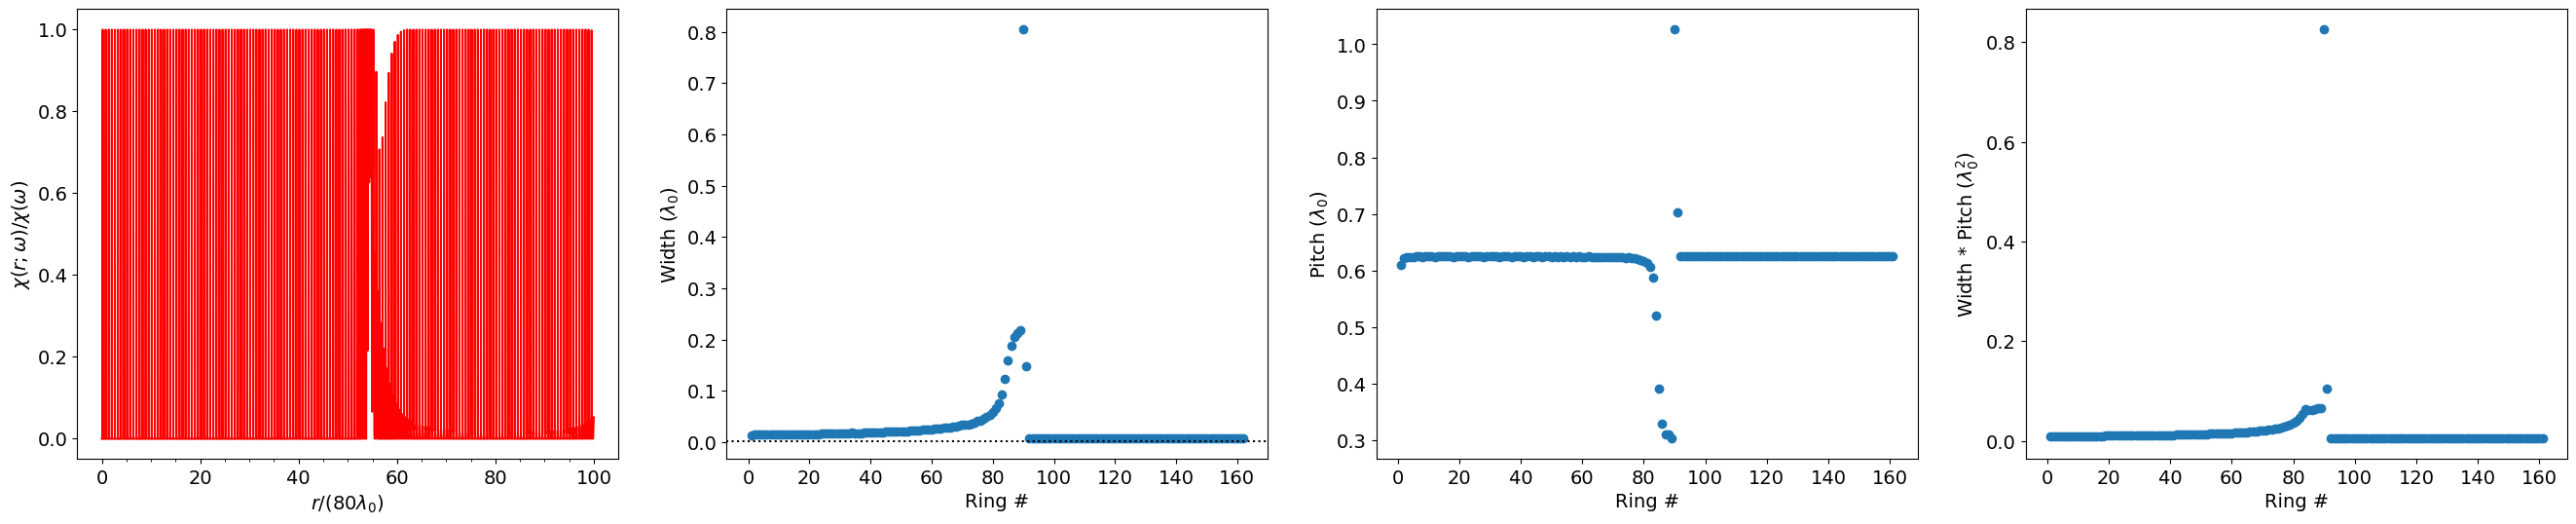

In [21]:
###Plot L=160 version
#plot rings
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(33,6))
des_list = np.loadtxt('DATA_PRL2/TMcyl_chi4+1e-1j_R80_gpr1500_Qsrc5.0e+06_optdof.txt')
desR = 80
gpr=1200
ax1.plot(np.arange(0, len(des_list))/gpr + 0.5/gpr, des_list, 'r')
ax1.set_xlabel('$r/(' + str(desR) + '\lambda_{0}$)')
ax1.set_ylabel('$\chi(r;\omega)/\chi(\omega)$')
ax1.xaxis.set_minor_locator(AutoMinorLocator())
#plot widths
indGrating = np.nonzero(des_list.round())
gratings = consecutive(indGrating[0])
ax2.plot(np.linspace(1, len(gratings), num=len(gratings), endpoint=True), [len(gratings[i])/gpr for i in range(len(gratings))], 'o')
ax2.set_xlabel('Ring #')
ax2.set_ylabel('Width ($\lambda_{0}$)')
ax2.axhline(y = 1/gpr, color = 'black', linestyle = ':')
# ax2.set_yscale('log')
# ax2.set_xscale('log')
#plot spacing
ax3.plot(np.linspace(1, len(gratings)-1, num=len(gratings)-1, endpoint=True), [(gratings[i+1][0] - gratings[i][0])/gpr for i in range(len(gratings)-1)], 'o')
ax3.set_xlabel('Ring #')
ax3.set_ylabel('Pitch ($\lambda_{0}$)')
# ax3.set_yscale('log')
# ax3.set_xscale('log')
#product of spacing and thickness
ax4.plot(np.linspace(1, len(gratings)-1, num=len(gratings)-1, endpoint=True), [len(gratings[i])*(gratings[i+1][0] - gratings[i][0])/gpr**2 for i in range(len(gratings)-1)], 'o')
ax4.set_xlabel('Ring #')
ax4.set_ylabel('Width * Pitch ($\lambda_{0}^{2}$)')
# ax4.set_yscale('log')
# ax4.set_xscale('log')
#try to fit squared func
# sqcoeff = len(gratings[0])*(gratings[0+1][0] - gratings[0][0])/gpr
# ax4.plot(np.linspace(1, len(gratings)-1, num=len(gratings)-1, endpoint=True), [sqcoeff*(i+1)**2 for i in range(len(gratings)-1)], 'o')

plt.savefig('minLDOS_TM_chi4+1e-1jQsrc5.0e+06_cyl_L160.pdf', bbox_inches='tight')

In [22]:
gratings[0]

array([208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223])

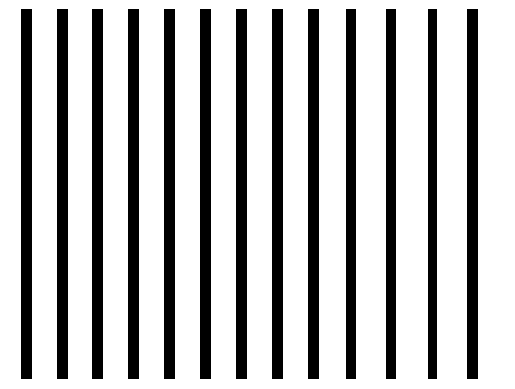

In [23]:
import matplotlib.patches as mpatches
des_list = np.loadtxt('DATA_PRL/TMcyl_chi4+0j_R5_gpr1200_Qsrc5.0e+06_optdof.txt')
indGrating = np.nonzero(des_list.round())
gratings = consecutive(indGrating[0])

plt.figure()
ax = plt.axes()
for i in range(len(gratings) - 1):
    xL = gratings[i][0]
    xR = gratings[i][-1]
    art = mpatches.Rectangle((xL/len(des_list), 0), (xR - xL + 1)/len(des_list), 1.0, ec="none", color='black')
    ax.add_artist(art)
plt.axis('off')
plt.savefig('chi4+0j_R5_dwQsrc1e6_optdof_radial_rings.pdf', bbox_inches='tight')

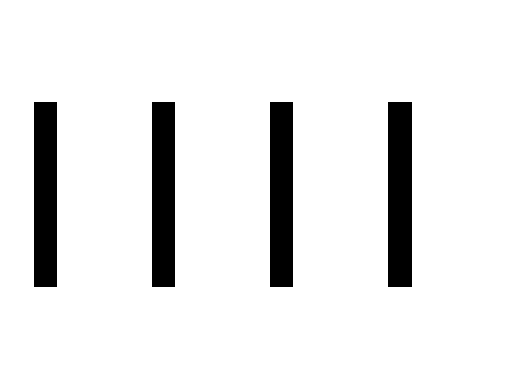

In [24]:
#phc section
import matplotlib.patches as mpatches

plt.figure()
ax = plt.axes()
numBiLayers = 4
for i in range(numBiLayers):
    delta = 0.8
    h = 1 - delta
    art = mpatches.Rectangle((-delta - i*1 - h, 0), h, 1.0, ec="none", color='black')
    ax.add_artist(art)
plt.xlim([-numBiLayers - h, 0])
plt.ylim([-0.5, 1.5])
plt.axis('off')
plt.savefig('half_infinite_phc.pdf', bbox_inches='tight')